<a href="https://colab.research.google.com/github/C23-PS418/Bicaraku/blob/ML/CNN_Bicaraku_Kata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown --id 1Bwj-Nj4c34bStnwC0X7pE3XDfpWgJKaP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Bwj-Nj4c34bStnwC0X7pE3XDfpWgJKaP
To: /content/word_sign-language.csv
100% 370M/370M [00:06<00:00, 52.9MB/s]


In [3]:
import pandas as pd
import tensorflow as tf
import csv
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
# Read the CSV file containing the dataset
dataset_file = 'word_sign-language.csv'
df = pd.read_csv(dataset_file)

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
# Split the dataset into train, validation, and test sets
train_df = df.sample(frac=0.8, random_state=1)
val_df = df.sample(frac=0.10, random_state=1)
test_df = df.sample(frac=0.10, random_state=1)

train_df.head()

,after,171,169,175,177,177.1,175.1,176,175.2,173,...,120.10,122.21,118.19,116.12,117.10,114.12,116.13,113.10,110.5,112.7
24111,before,81,83,83,82,82,81,80,81,83,...,50,47,46,44,47,47,46,45,46,46
12852,will,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
23443,want,178,178,178,178,178,178,178,178,178,...,167,153,169,157,157,167,161,162,166,167
42170,only,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
39191,that,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [6]:
# Extract labels
train_label = train_df[train_df.columns[0]]
val_label = val_df[val_df.columns[0]]
test_label = test_df[test_df.columns[0]]

print(train_label.shape)

(34399,)


In [7]:
train_df.drop(columns=train_df.columns[0], inplace=True)
val_df.drop(columns=val_df.columns[0], inplace=True)
test_df.drop(columns=test_df.columns[0], inplace=True)

train_df.head(5)

,171,169,175,177,177.1,175.1,176,175.2,173,174,...,120.10,122.21,118.19,116.12,117.10,114.12,116.13,113.10,110.5,112.7
24111,81,83,83,82,82,81,80,81,83,84,...,50,47,46,44,47,47,46,45,46,46
12852,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
23443,178,178,178,178,178,178,178,178,178,178,...,167,153,169,157,157,167,161,162,166,167
42170,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
39191,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [8]:
# Convert dataframes to numpy arrays
train_data = train_df.values
val_data = val_df.values
test_data = test_df.values
train_data.shape


(34399, 2500)

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_label = label_binarizer.fit_transform(train_label)
val_label = label_binarizer.transform(val_label)
test_label = label_binarizer.transform(test_label)
train_label[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
# Normalize the data
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0



In [11]:
# Reshape the data from 1-D to 3-D as required for CNN input
train_data = train_data.reshape(-1, 50, 50, 1)
val_data = val_data.reshape(-1, 50, 50, 1)
test_data = test_data.reshape(-1, 50, 50, 1)


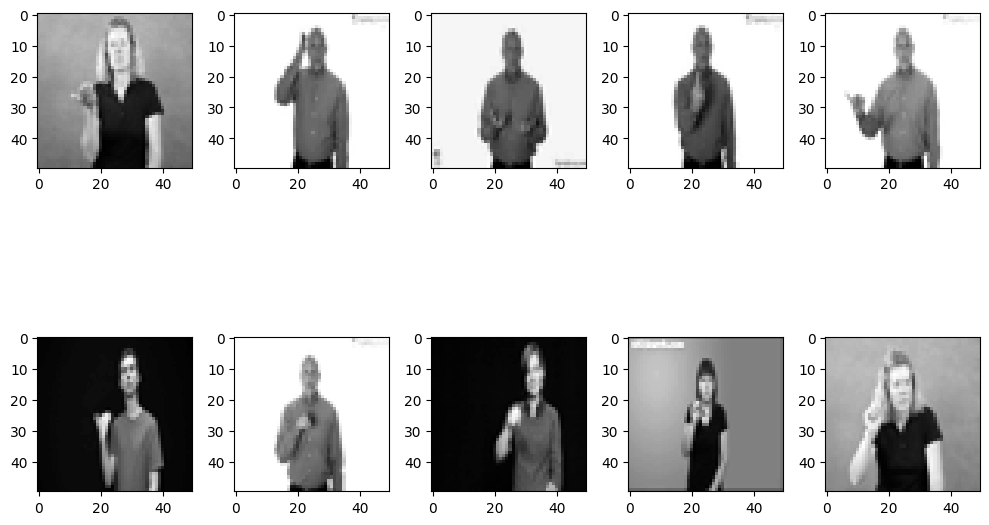

In [12]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(train_data[k].reshape(50, 50), cmap='gray')
        k += 1
    plt.tight_layout()    

In [13]:
# With data augmentation to prevent overfitting

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_data)

In [14]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(AccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            print(f"\nReached target accuracy of {self.target_accuracy*100}%")
            self.model.stop_training = True

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(125 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (50,50,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(100 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 512 , activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units = 43 , activation = 'softmax')
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 125)       1250      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 125)      500       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 125)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 100)       112600    
                                                                 
 dropout (Dropout)           (None, 25, 25, 100)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 100)      4

In [16]:
# Define your callback
target_accuracy = 1
accuracy_callback = AccuracyCallback(target_accuracy)

# Train the model with the callback
history = model.fit(datagen.flow(train_data, train_label, batch_size = 128),
                    epochs = 30, 
                    validation_data = (val_data, val_label),
                    callbacks = [accuracy_callback])

Epoch 1/30
269/269 [==============================] - 38s 90ms/step - loss: 2.2995 - accuracy: 0.3748 - val_loss: 4.5420 - val_accuracy: 0.0484
Epoch 2/30
269/269 [==============================] - 23s 87ms/step - loss: 0.5524 - accuracy: 0.8218 - val_loss: 2.1232 - val_accuracy: 0.4344
Epoch 3/30
269/269 [==============================] - 24s 87ms/step - loss: 0.2316 - accuracy: 0.9249 - val_loss: 0.2965 - val_accuracy: 0.9033
Epoch 4/30
269/269 [==============================] - 23s 84ms/step - loss: 0.1333 - accuracy: 0.9565 - val_loss: 0.0139 - val_accuracy: 0.9974
Epoch 5/30
269/269 [==============================] - 23s 85ms/step - loss: 0.1024 - accuracy: 0.9668 - val_loss: 0.0189 - val_accuracy: 0.9951
Epoch 6/30
269/269 [==============================] - 23s 84ms/step - loss: 0.0841 - accuracy: 0.9728 - val_loss: 0.0158 - val_accuracy: 0.9937
Epoch 7/30
269/269 [==============================] - 25s 92ms/step - loss: 0.0683 - accuracy: 0.9779 - val_loss: 0.0234 - val_accuracy:

In [17]:
print("Accuracy of the model is - " , model.evaluate(val_data,val_label)[1]*100 , "%")

135/135 [==============================] - 1s 6ms/step - loss: 0.0291 - accuracy: 0.9891
Accuracy of the model is -  98.90697598457336 %


In [18]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

confusion_mat = confusion_matrix(np.argmax(test_label, axis=1), predicted_labels)

print("Confusion Matrix:")
print(confusion_mat)

135/135 [==============================] - 1s 6ms/step
Confusion Matrix:
[[112   0   0 ...   0   0   0]
 [  0 101   0 ...   0   0   0]
 [  0   0  77 ...   0   0   0]
 ...
 [  0   0   0 ... 109   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   0   0 ...   0   0 107]]


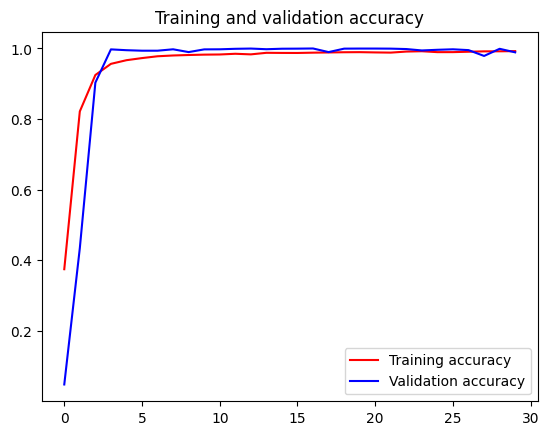

<Figure size 640x480 with 0 Axes>

In [19]:


# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [20]:
predictions = model.predict(test_data)

print(np.argmax(test_label[:20], axis=1))
print(np.argmax(predictions[:20], axis=1))

135/135 [==============================] - 1s 4ms/step
[ 9 38 31 25 27  9 29 41 41 35 10 10 41  6 35 12 42 12 31 40]
[ 9 38 31 25 27  9 29 41 41 35 10 10 41  6 35 12 42 12 31 40]


<Axes: >

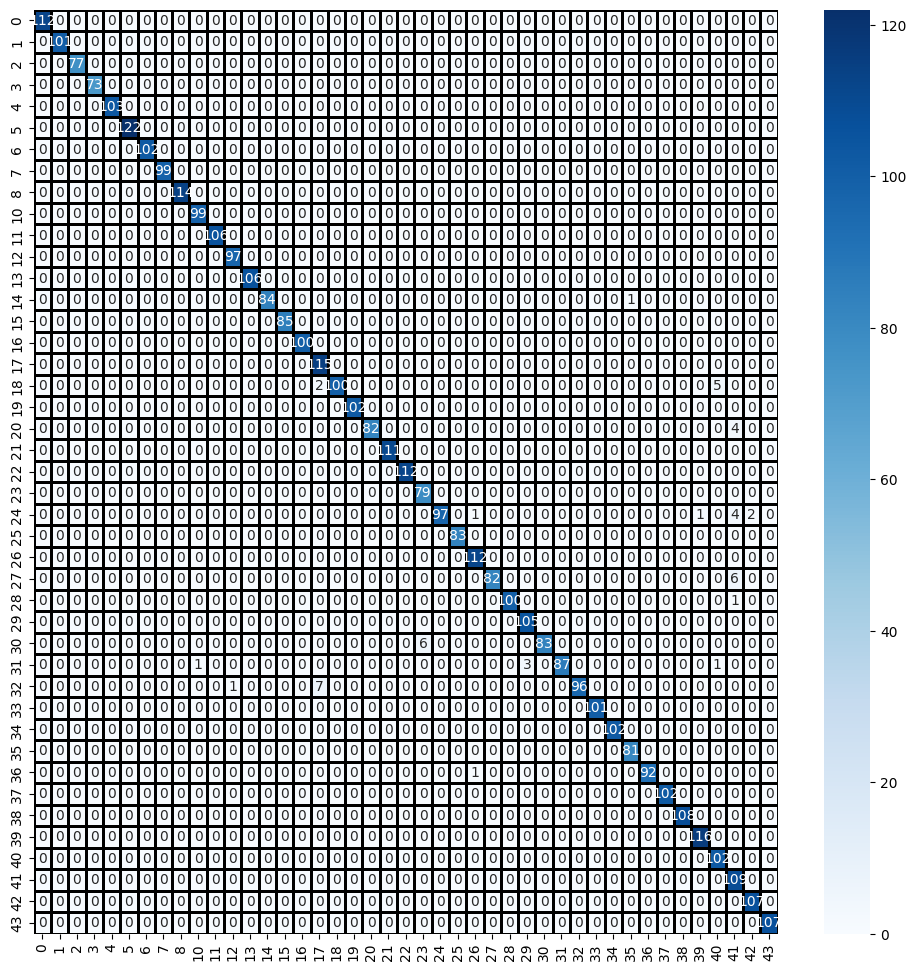

In [21]:
cm = confusion_matrix(np.argmax(test_label, axis=1), np.argmax(predictions, axis=1))
cm = pd.DataFrame(cm , index = [i for i in range(44) if i != 9] , columns = [i for i in range(44) if i != 9])
plt.figure(figsize = (12,12))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [22]:

saved_model_path = "./bicaraku.h5"

model.save(saved_model_path)

In [23]:

# Load the Keras model
model = tf.keras.models.load_model('bicaraku.h5')

# Convert Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)